In this notebook we will explore the dataset of Houses in King County Washington. First we import all necessary packages and both csv as dataframes.

In [46]:
#import the data and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [8]:
df_sales = pd.read_csv("data/eda.csv")
df_details = pd.read_csv("data/eda_details.csv")

After this we do some regular research to find some basic information about the dataframes. Although we prepare everything for the merge process of the both dataframes.

In [ ]:
df_details.info()
df_details.tail()
df_details.rename(columns={"id": "house_id"}, inplace=True)
df_details.info()

In [35]:
df_sales.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


In [16]:
# change "date" dtype to datetime with format %Y/%m/%d
df_sales['date'] = pd.to_datetime(df_sales['date'], format='%Y/%m/%d')

In [17]:
type(df_sales["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
#check if there are duplicates
df_details.duplicated().value_counts()

False    21420
dtype: int64

In [28]:
df_details.nunique()
df_full = df_details.copy

Here we merge both dataframes.

In [ ]:
df = pd.merge(df_details, df_sales, on="house_id")

df

Now we create a new dataframe called "waterfront" which is used for our first plot including the map of Washington.

In [44]:
df["waterfront"].value_counts()

0.0    19060
1.0      146
Name: waterfront, dtype: int64

In [ ]:
df_water = df[(df["waterfront"] ==1)] ##create dataframe only with houses including waterfront


In [227]:
fig = px.scatter_mapbox(df_water,
    lon = df_water["long"],
    lat = df_water["lat"],
    hover_name = df_water["price"],
    color = "price", 
    zoom = 8.8
    )
fig.update_geos(fitbounds="locations"),


fig.update_layout(
    mapbox_style = "open-street-map",
    title = "Houses with waterfront",
    width = 800,
    height = 600
)

fig.show()

After this first plot we specify our data from before. For our customer we add some more variables. Our customer want enough space for their children and no children in their neighborhood. For this we filter at the columns "sqft_living15" and "bathrooms".

In [130]:
# houses in childless area
df_childless = df_water[(df_water["sqft_living15"] < 1500 )]

In [ ]:
fig = px.scatter_mapbox(df_childless,
    lon = df_childless["long"],
    lat = df_childless["lat"],
    hover_name = df_childless["price"],
    color = "price", 
    zoom = 8.8
    )
fig.update_geos(fitbounds="locations"),


fig.update_layout(
    mapbox_style = "open-street-map",
    title = "Houses with waterfront",
    width = 800,
    height = 600
)

fig.show()

In [148]:
df_child = df_childless[(df_childless["bedrooms"] >= 2)]

In [152]:
#houses with at least 2 bathrooms and bedrooms
df_bathroom = df_child[(df_child["bathrooms"]>= 2)]

In [229]:
fig = px.scatter_mapbox(df_bathroom,
    lon = df_bathroom["long"],
    lat = df_bathroom["lat"],
    hover_name = df_bathroom["price"],
    color = "price", 
    zoom = 8.8
    )
fig.update_geos(fitbounds="locations"),


fig.update_layout(
    mapbox_style = "open-street-map",
    title = "Houses with waterfront (Hover for price)",
    width = 800,
    height = 600
)

fig.show()

Now we have a look, if there is a connection between the price and the total amount of bedrooms. For this we use the Groupby function to group all different amount of bedroom. After that we create a series, which shows us the median for every price in this grouped segment. Then we plot this in a simple bar chart.

In [163]:


group_bed = df.groupby("bedrooms")

In [199]:
bed = group_bed.median()["price"]

bed = bed.drop(6)
bed = bed.drop([7,8,9,10,11,33])
rooms = pd.Series([0,1,2,3,4,5])
bed = pd.concat([rooms, bed], axis = 1)
bed["bedrooms"] = bed[0]
bed.drop(labels = 0, axis = 1, inplace = True)
bed.drop(labels = 0, axis = 0, inplace = True)


In [224]:
fig = px.bar(bed, x="bedrooms", y='price', title="Price and bedrooms")

fig.show()

Last but not least we will have a look at the links between sqft of living and sqft lot and the hole price of a house. To see this possible connection we use two scatter plots.

Text(0.5, 1.0, 'Price of living room')

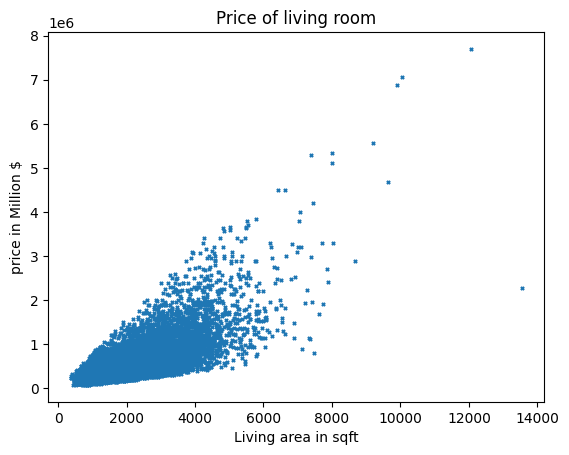

In [222]:
plt.scatter(x = df["sqft_living"], y = df["price"], marker="x", s = 5)
plt.ylabel ("price in Million $")
plt.xlabel ("Living area in sqft")
plt.title("Price of living room")

Text(0.5, 1.0, 'Price of lot')

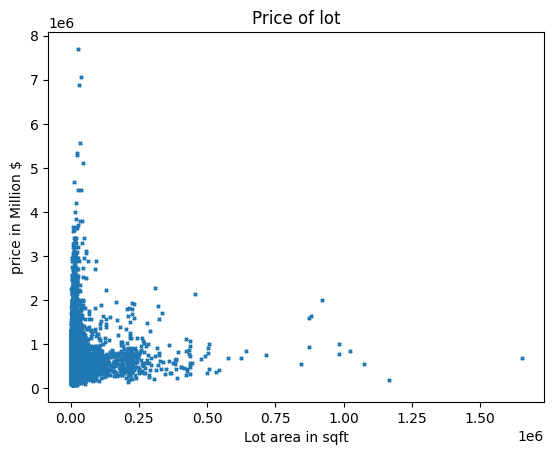

In [223]:
plt.scatter(x = df["sqft_lot"], y = df["price"], marker="x", s = 5)
plt.ylabel ("price in Million $")
plt.xlabel ("Lot area in sqft")
plt.title("Price of lot")